In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline

In [2]:
PATH_TO_DATA = f'cycle_irregularity_dataset.csv'
df = pd.read_csv(PATH_TO_DATA)

In [3]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
user_id               0
cycle_length          0
ovulation_day         0
symptoms              0
irregularity_label    0
dtype: int64


C:\Users\medha\AppData\Local\Temp\ipykernel_12004\2798381487.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='irregularity_label', data=df, palette='pastel')


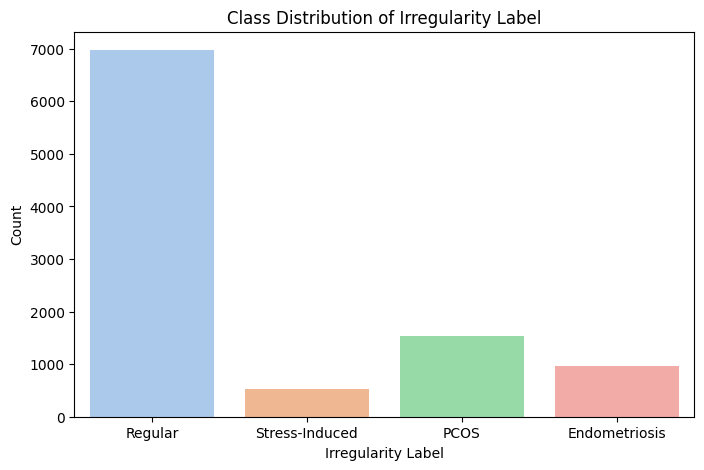

In [4]:
# Class distribution of irregularity label
plt.figure(figsize=(8,5))
sns.countplot(x='irregularity_label', data=df, palette='pastel')
plt.title("Class Distribution of Irregularity Label")
plt.xlabel("Irregularity Label")
plt.ylabel("Count")
plt.show()

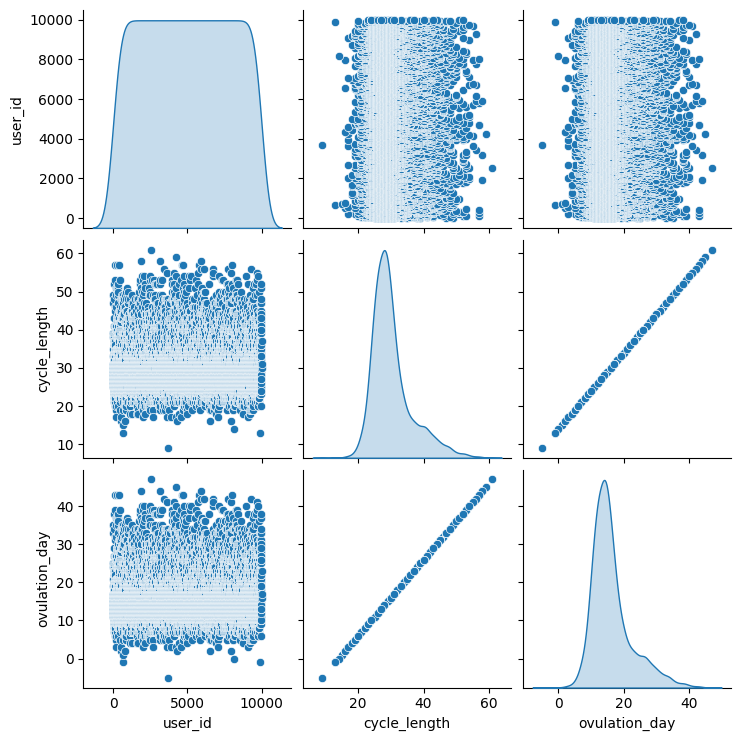

In [5]:
# Pairplot for first few features
sns.pairplot(df.iloc[:, :6], diag_kind='kde')
plt.show()

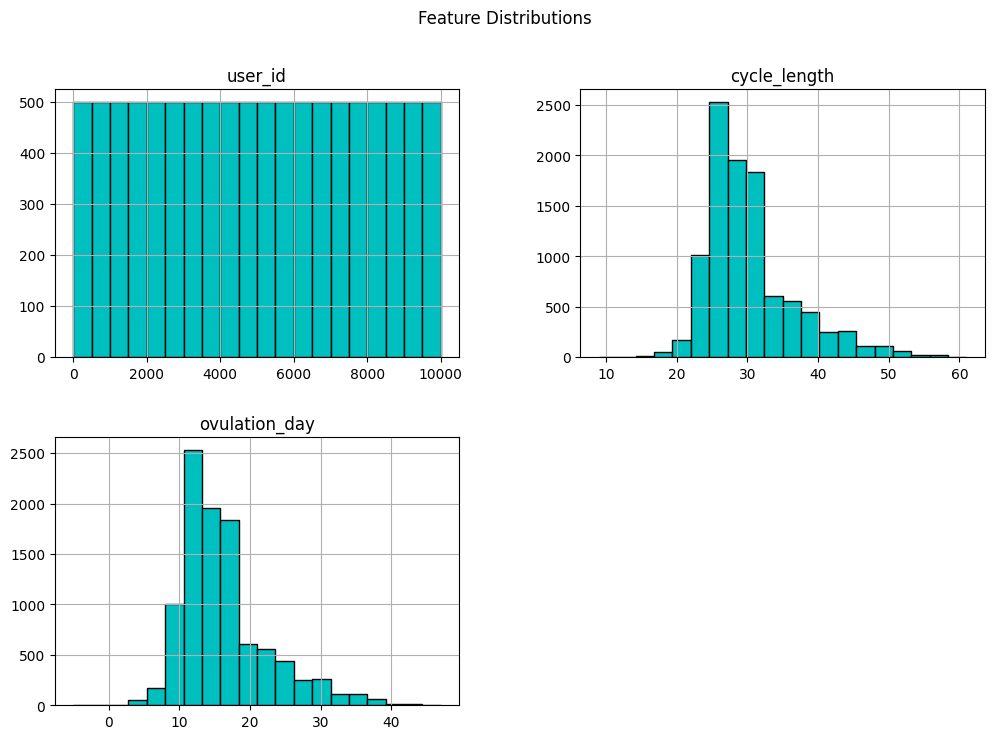

In [6]:
# Distribution of first few features
df.iloc[:, :6].hist(figsize=(12,8), bins=20, color='c', edgecolor='k')
plt.suptitle("Feature Distributions")
plt.show()

In [7]:
df['symptoms'] = df['symptoms'].str.split(', ')

# one hot encoding
symptoms_dummies = df['symptoms'].explode().str.get_dummies()
df = df.drop(columns=['symptoms']).join(symptoms_dummies)
df = df.drop(columns=['user_id'])

label_encoder = LabelEncoder()
df['irregularity_label'] = label_encoder.fit_transform(df['irregularity_label'])

df.to_csv("processed_cycle_irregularity_dataset.csv", index=False)
print(df.head())

   cycle_length  ovulation_day  irregularity_label  chronic pelvic pain  \
0            30             16                   2                    0   
0            30             16                   2                    0   
0            30             16                   2                    0   
0            30             16                   2                    1   
1            30             16                   2                    1   

   delayed cycle  fatigue  heavy bleeding  irregular spotting  light flow  \
0              0        1               0                   0           0   
0              0        0               0                   0           0   
0              0        0               0                   0           0   
0              0        0               0                   0           0   
1              0        0               0                   0           0   

   mild cramps  mood swings  normal flow  painful periods  severe cramps  \
0         

In [8]:
# Splitting features and target
X = df.drop(columns=['irregularity_label'])
y = df['irregularity_label']

# Splitting dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [10]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")
print(f"Testing F1 Score: {test_f1:.4f}")

Training Accuracy: 0.8118
Testing Accuracy: 0.8067
Training F1 Score: 0.7728
Testing F1 Score: 0.7668


In [11]:
cycle_length = 38
ovulation_day = 24
symptoms = ["light flow", "severe cramps", "painful periods"]

# Create a dictionary with all possible symptoms initialized to 0
symptom_cols = [col for col in df.columns if col not in ['cycle_length', 'ovulation_day', 'irregularity_label']]
input_data = {col: 0 for col in symptom_cols}
input_data.update({'cycle_length': cycle_length, 'ovulation_day': ovulation_day})

# Set the provided symptoms to 1
for symptom in symptoms:
    if symptom in input_data:
        input_data[symptom] = 1

In [12]:
prediction_df = pd.DataFrame([input_data])
prediction_df = prediction_df[X_train.columns]
prediction = model.predict(prediction_df)
predicted_label = label_encoder.inverse_transform(prediction)[0]

print(f"\nPredicted Irregularity Label: {predicted_label}")


Predicted Irregularity Label: PCOS


In [13]:
import pickle

with open("irregularity_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Also save the label encoder if needed for future predictions
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)